# 1. BUSINESS PROBLEM
---

## 1.1. Context

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Problem description on Kaggle: [click here](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data) to more information.

Note: the example has Rs. i.e. Rupee, an Indian money sign. So, the problem potentially is from an indian company.

## 1.2.Understanding the problem

### 1.2.1. Motivation

An Insurance company wants to cross sell the health insurance with vehicle insurance.

### 1.2.2. Root cause of the problem

Ensuring optimal coverage for both health and vehicle-related contingencies poses a unique challenge in cross-selling insurance products. Identifying clients willing to accept vehicle insurance alongside their health coverage while also remaining cognizant of potential health and vehicle-related issues is paramount.

The primary objective lies in attracting clients who not only find value in bundling these insurances but also contribute to the profitability of the portfolio.

### 1.2.3. Solution format

- Granularity and problem type: ID classification of interested or not
- Potential solution methods: logistic regression, tree based models, KNN;
- Delivery format:
    - Client prediction of interest on vehicle insurance;
    - Possibility of *google sheets* to check the clients information and customize the priorization, not just by rank of customer profit.

# 2. IMPORTS
---

## 2.1. Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## 2.2. Helper functions

## 2.3. Loading data

I downloaded the dataset from Kaggle. However, to replicate a true operational environment, I uploaded the data to a specific server on Render and accessed it using SQL queries. 

All the process has been documented on "upload_and_get_data" folder and the official data have been stored on data/raw folder.


In [3]:
df = pd.read_csv('../data/raw/health_insurance_cross_sell.csv').sort_values('id')

# 3. DATA DESCRIPTION
---

|Variable|Definition|
|--------|----------|
|id|Unique ID for the customer|
|Gender|Gender of the customer|
|Age|Age of the customer|
|Driving_License|0 : Customer does not have DL, 1 : Customer already has DL|
|Region_Code|Unique code for the region of the customer|
|Previously_Insured|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|Vehicle_Age|Age of the Vehicle|
|Vehicle_Damage|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|Annual_Premium|The amount customer needs to pay as premium in the year|
|Policy_Sales_Channel|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|Vintage|Number of Days, Customer has been associated with the company|
|Response|1 : Customer is interested, 0 : Customer is not interested|

In [4]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
95113,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
444877,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
95114,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
381280,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
158524,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 3.1. Data dimension

In [5]:
print(f'Number of rows: {df.shape[0]};')
print(f'Number of columns: {df.shape[1]}.')

Number of rows: 508146;
Number of columns: 12.


## 3.2. Data types

In [6]:
df.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 3.3. Check NaN values

In [7]:
df.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 3.4. Descriptive statistics

Before we start, I want to separate the numerical and categorical variables, just because the analysis to these sets are different.

In [8]:
# Defining the numerical and categorical dfs
num_attributes = df[['age', 'annual_premium', 'vintage']]


cat_attributes = df[['gender', 'driving_license', 'region_code', 'previously_insured', 
                     'vehicle_age', 'vehicle_damage', 'policy_sales_channel', 'response']]

# Showing these dataframes
print('Numerical attributes:')
display(num_attributes)

print('Categorical attributes:')
display(cat_attributes)

Numerical attributes:


,age,annual_premium,vintage
95113,44,40454.0,217
444877,76,33536.0,183
95114,47,38294.0,27
381280,21,28619.0,203
158524,29,27496.0,39
...,...,...,...
190348,26,30867.0,56
413067,38,28700.0,165
444876,21,29802.0,74
476538,71,62875.0,265


Categorical attributes:


,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,response
95113,Male,1,28.0,0,> 2 Years,Yes,26.0,1
444877,Male,1,3.0,0,1-2 Year,No,26.0,0
95114,Male,1,28.0,0,> 2 Years,Yes,26.0,1
381280,Male,1,11.0,1,< 1 Year,No,152.0,0
158524,Female,1,41.0,1,< 1 Year,No,152.0,0
...,...,...,...,...,...,...,...,...
190348,Female,1,37.0,1,< 1 Year,No,152.0,0
413067,Female,1,28.0,0,1-2 Year,Yes,122.0,0
444876,Male,1,46.0,1,< 1 Year,No,152.0,0
476538,Male,1,28.0,1,1-2 Year,No,26.0,0


In [29]:
# Creating the metrics dataframe
metrics = num_attributes.describe().T

# Creating the skewness and kurtosis of each variables
skews = num_attributes.apply(lambda x: x.skew()).T
kurtosis = num_attributes.apply(lambda x: x.kurtosis()).T

# Creating the range of min and max values
metrics['range'] = metrics['max'] - metrics['min']

# Adding the skews and kurthosis values on metrics dataframe
metrics['skew'] = skews
metrics['kurtosis'] = kurtosis

# Changing the index to a variable and renaming it
metrics.reset_index(inplace=True)
metrics.rename({'index':'attribute'}, axis=1, inplace=True)

# Changing the order of columns apresentation on dataframe
metrics = metrics[['attribute', 'min', '25%', '50%', '75%', 'max', 'range', 'mean', 
                   'std', 'skew', 'kurtosis']]
display(metrics)

,attribute,min,25%,50%,75%,max,range,mean,std,skew,kurtosis
0,age,20.0,25.0,36.0,49.00,85.0,65.0,38.808413,15.500179,0.672751,-0.564665
1,annual_premium,2630.0,24381.0,31661.0,39403.75,540165.0,537535.0,30554.453041,17146.574625,1.600176,30.047860
2,vintage,10.0,82.0,154.0,227.00,299.0,289.0,154.340123,83.668793,0.002639,-1.200259


- There is a high kurtosis on `annual_premium`. So, the data is concentrated in a small range i.e. low dispersion

- Our max value is Rs. 540,165, maybe it is normal to India

- The `vintage` doesn't complete 1 year

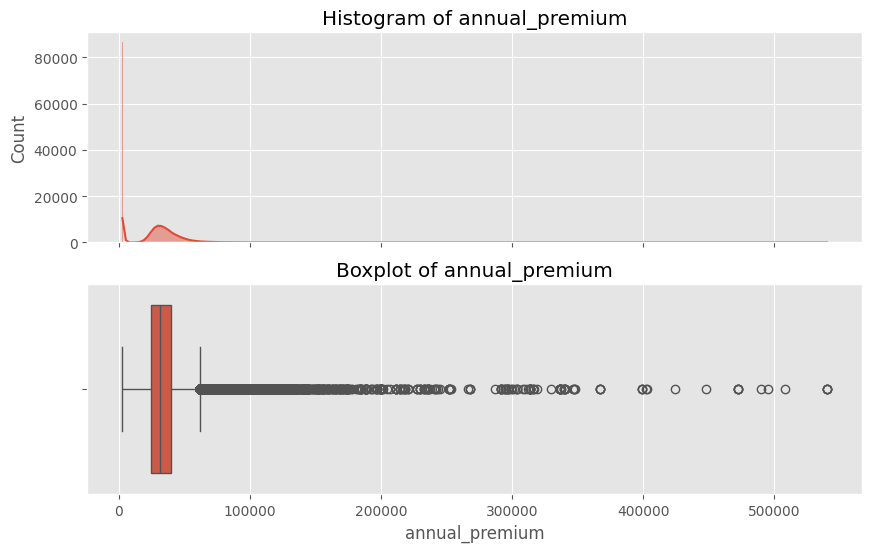

In [10]:
# Showing the annual_premium distribution
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 6))
sns.histplot(data=df, x='annual_premium', ax=axs[0], kde=True)
axs[0].set_title('Histogram of annual_premium')

sns.boxplot(data=df, x='annual_premium', ax=axs[1])
axs[1].set_title('Boxplot of annual_premium')

plt.show()

**MY FEELING**

There are a lot of data **next to zero** and a **high quantity of outliers**... we have to pay attention in this variable for the models. Some possible explanation of outliers:
- **High correlation with age or gender** and **quantity of people** relation. If there are a lot of young people or female gender in our data then make sense
- **Familiar health insurance**, making the `annual_premium` more expensive
- Input human error
- True value of health insurance

Note: female gender lives more compared to male, it's a statistic data.

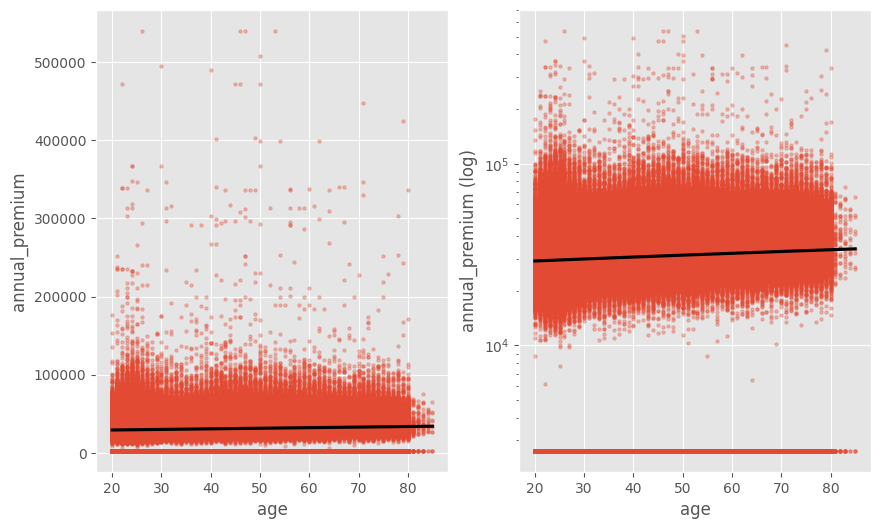

In [27]:
# Check the correlation of annual_premium and age
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
sns.regplot(data=df, x='age', y='annual_premium',
            scatter_kws={'s': 5, 'alpha': 0.3}, 
            line_kws={'color': 'black'}, ax=axs[0])

sns.regplot(data=df, x='age', y='annual_premium',
            scatter_kws={'s': 5, 'alpha': 0.3}, 
            line_kws={'color': 'black'}, ax=axs[1])
axs[1].set_ylabel('annual_premium (log)')
axs[1].set_yscale('log');

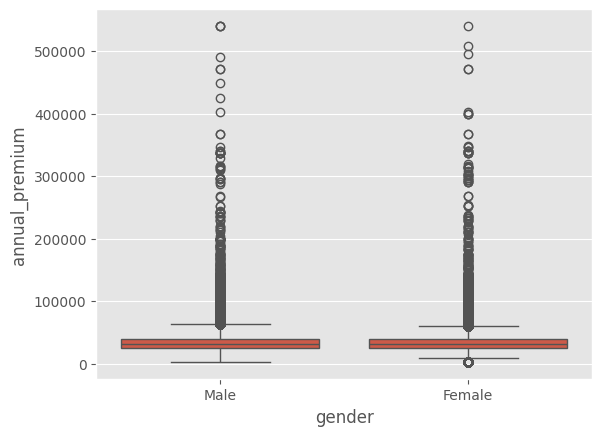

In [31]:
# Check annual_premium with gender
sns.boxplot(data=df, x='gender', y='annual_premium');

From the figures, `annual_premium` has a low correlation with `age` and a low relationship with `gender`...

**SOME RESEARCH FROM ACKO HEALTH INSURANCE**

The webpage from Acko (indian health insurance company) provides comprehensive guidance on determining the appropriate amount of health insurance coverage for individuals and families. Here are the key points covered:

1. **Assessment Factors**: The amount of health insurance needed depends on several factors, including age, family size, lifestyle, medical history, and geographic location. Younger individuals and those with fewer dependents typically require less coverage compared to older individuals or those with larger families.

2. **Coverage Amount**: Acko suggests that the sum insured should ideally be at least half of one’s annual income. This ensures adequate coverage without overstretching finances. For families with elderly members or those with specific health needs, higher coverage plans are recommended, such as the ACKO Platinum Health Plan, which offers a higher sum insured and additional benefits like zero waiting periods and no claim deductions.

3. **Health Insurance Plans**: Acko offers various health insurance plans, including:
   - **ACKO Standard Health Plan**: Suitable for general needs with sums insured ranging from **Rs. 10 lakhs to Rs. 1 crore**, covering critical illnesses and pre and post-hospitalization expenses.
   - **ACKO Platinum Health Plan**: Designed for comprehensive coverage with options up to **Rs. 1 crore and unlimited sum insured**, zero co-payment, and multiple built-in add-ons.
   - **ACKO Platinum Super Top-up Plan**: Provides **high sum insured options** and covers critical illnesses, emergency evacuations, and multiple ambulance trips.

4. **Special Considerations**: For individuals with specific health needs or pre-existing conditions, plans like the ACKO Platinum Health Plan are ideal due to their extensive coverage and lack of waiting periods. Additionally, for families with elderly members, super top-up plans can provide additional security without requiring an additional primary insurance package.

5. **Government Schemes**: The Ayushman Bharat scheme (Pradhan Mantri Jan Arogya Yojana) provides free health care for economically weaker sections, offering coverage up to **Rs. 5 lakhs per family per year**, including pre and post-hospitalization expenses and pre-existing disease coverage.

Overall, the decision on the amount of health insurance to purchase should be based on a thorough evaluation of personal and family health needs, income levels, and potential future medical expenses. For detailed information, you can visit the Acko website directly at [Acko Health Insurance Guide](https://www.acko.com/health-insurance/deciding-how-much-health-insurance-you-need/).

Note: A crore (cr) denotes ten million and is equal to 100 lakh in the Indian numbering system. So 1 lakh is 100,000 rupees.

So, the values from this variable is normal to ACKO!

In [57]:
# Getting the categorical description
for cat in cat_attributes.columns:
    count = pd.DataFrame(cat_attributes[cat].value_counts())
    prop = pd.DataFrame(cat_attributes[cat].value_counts(normalize=True))
    
    grouped_info = count.join(prop)
    display(round(grouped_info, 3))

,count,proportion
gender,,
Male,274325,0.54
Female,233821,0.46


,count,proportion
driving_license,,
1,507097,0.998
0,1049,0.002


,count,proportion
region_code,,
28.0,141937,0.279
8.0,44900,0.088
46.0,26357,0.052
41.0,24400,0.048
15.0,17750,0.035
30.0,16276,0.032
29.0,14843,0.029
50.0,13657,0.027
3.0,12349,0.024


,count,proportion
previously_insured,,
0,275076,0.541
1,233070,0.459


,count,proportion
vehicle_age,,
1-2 Year,267015,0.525
< 1 Year,219805,0.433
> 2 Years,21326,0.042


,count,proportion
vehicle_damage,,
Yes,256248,0.504
No,251898,0.496


,count,proportion
policy_sales_channel,,
152.0,179523,0.353
26.0,106594,0.210
124.0,98299,0.193
160.0,29090,0.057
156.0,14313,0.028
...,...,...
143.0,1,0.000
84.0,1,0.000
41.0,1,0.000


,count,proportion
response,,
0,461436,0.908
1,46710,0.092


- We are working with **imbalanced data**, we have just **10% of interest on vehicle insurance**.

- Maybe we can create some variables from:
    - `region_code`: `famous_region` i.e. most famous region code or not (28)
    - `vehicle_age`: `vehicle_age2` i.e. "< 1 Year" and ">= 1 Year"
    - `policy_sales_channel`: `famous_policy_sales_channel` i.e. most famous policy sales channels or not (152, 26 and 124)

    The main purpose is just to simplify our future models.